# Saudi Arabia Used Cars

Source : [Saudi Arabia Used Cars Dataset](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)
****

### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## 1. Business Problem Understanding

### Context

Pada saat ini, mobil menjadi salah satu kebutuhan utama bagi masyarakat perkotaan yang memiliki mobilitas tinggi. Mobil dapat memberikan rasa aman, nyaman, dan menghemat waktu bagi penggunanya, terutama apabila tidak ada transportasi umum yang memadai. Dalam memenuhi kebutuhan ini, konsumen tidak hanya tertarik dalam membeli mobil dengan keadaan baru, tetapi juga banyak yang tertarik untuk membeli mobil dalam keadaan bekas. Di negara Arab Saudi, terdapat sebuah platform jual-beli mobil bekas bernama Syarah.com. Pada platform ini, konsumen dapat mencari mobil bekas impian mereka dengan harga yang lebih murah dibandingkan dengan harga membeli mobil yang baru. Rata-rata kondisi dari setiap mobil bekas yang dijualpun juga dalam keadaan baik dan depresiasi harga cenderung tidak terlalu tinggi dibandingkan dengan mobil baru. Syarah.com sebagai platform penyedia jasa jual-beli mobil bekas ingin konsumen mendapatkan pengalaman yang terbaik ketika bertransaksi membeli mobil bekas. Oleh karena itu, Syarah.com menyewa seorang Data Scientist untuk membantu mereka dalam membuat sebuah model bisnis yang dapat memprediksi harga mobil bekas dan bisa menguntungkan kedua belah pihak antara pembeli dan penjual.

Dataset terdiri atas 5624 data mobil bekas yang dikumpulkan dari Syarah.com. Setiap baris mewakili mobil bekas. Informasi lain yang mewakili setiap mobil adalah nama mobil, model mobil, tahun pembuatan, asal mobil, opsi kelengkapan mobil, kapasitas mesin, jenis transmisi, jarak tempuh yang pernah ditempuh mobil, harga berdasarkan wilayah, dan apakah mobil dapat dinegosiasikan. <br>

Features : <br>
- Type: Jenis mobil bekas.
- Region: Wilayah dimana mobil bekas ditawarkan untuk dijual.
- Make: Nama perusahaan pembuat mobil bekas.
- Gear_Type: Jenis transmisi yang digunakan mobil bekas.
- Origin: Asal mobil bekas.
- Options: Opsi kelengkapan mobil bekas.
- Year: Tahun produksi mobil bekas.
- Engine_Size: Kapasitas mesin mobil bekas.
- Mileage: Jarak tempuh mobil bekas.	
- Negotiable: Benar jika harga 0, berarti mobil bekas dapat dinegosiasi.
- Price: Harga dari mobil bekas.


### Problem Statement
Permasalahan yang dihadapi oleh Syarah.com adalah menentukan model bisnis yang dapat menguntungkan secara finansial untuk perusahaan ini dalam menjual mobil bekas. Tetapi juga memberikan pengalaman yang baik bagi para calon pembeli untuk mendapatkan mobil bekas layak pakai dengan harga yang wajar.

### Goals
Menentukan model bisnis yang dapat memprediksi dan membantu calon pembeli dalam mendapatkan harga yang wajar untuk setiap mobil bekas yang akan dibeli. Tetapi juga memberikan keuntungan bagi sang penjual mobil bekas, yaitu Syarah.com. 

### Analytic Approach
Melakukan analisa data untuk menemukan pola dari fitur-fitur yang ada dan dapat membedakan satu jenis mobil dengan jenis mobil lainnya. Kemudian membuat sebuah model regresi yang dapat membantu perusahaan dalam memprediksi harga jual yang tepat dan juga dapat bermanfaat bagi para calon pembeli dalam mendapatkan harga yang wajar untuk mobil bekas yang ingin mereka beli di Arab Saudi.

### Metric Evaluation
Evaluasi metrik yang akan digunakan dalam membangun model machine learning ini, yaitu:
- R-Square  : Menjelaskan seberapa besar variasi nilai Y yang dapat dijelaskan oleh model.
- RMSE      : Nilai rataan akar kuadrat dari error.
- MAE       : Rataan nilai absolut dari error.
- MAPE      : Rataan persentase error yang dihasilkan oleh suatu model regresi.

Model akan semakin akurat dalam memprediksi harga suatu mobil bekas sesuai dengan limitasi fitur yang dipakai apabila nilai R-Square semakin mendekati nilai 1 dan nilai RMSE, MAE, dan MAPE yang dihasilkan semakin kecil.

## 2. Data Understanding
- Dataset berasal dari daftar mobil bekas yang dijual di Arab Saudi via syarah.com.
- Informasi dan spesifikasi mengenai mobil yang dijual di syarah.com diwakili oleh setiap baris data.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car (Automatic / Manual) |
| Origin | Object | Origin of used car (Saudi / Gulf Arabic / Other) |
| Options | Object | Options of used car (Full / Semi-Full / Standard) |
| Year | Integer | Manufacturing Year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage of used car |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price |

Atribut Price merupakan target kolom yang akan diprediksi (Dependent Variable) dan kolom-kolom lain merupakan faktor-faktor yang akan mempengaruhi hasil prediksi (Independent Variable).

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df_SaudiCars = pd.read_csv('data_saudi_used_cars.csv')
df_SaudiCars.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0


### Exploratory Data Analysis

In [3]:
df_SaudiCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
df_SaudiCars.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Text(0.5, 1.0, 'Price Distribution Plot')

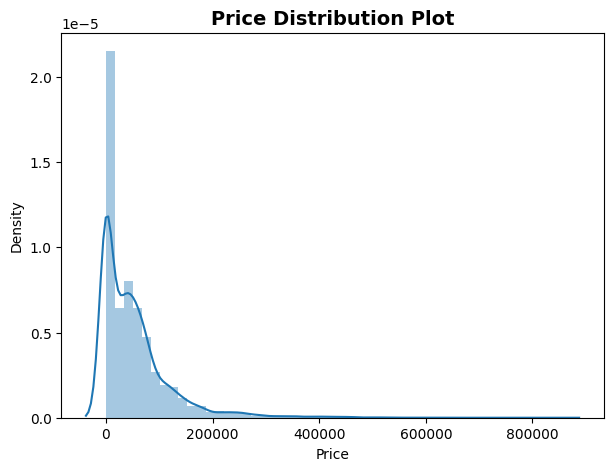

In [5]:
# Plot Distribusi Fitur 'Price'
plt.figure(figsize=(7, 5))
sns.distplot(df_SaudiCars['Price'])
plt.title('Price Distribution Plot', size= 14, weight='bold')

- Pada plot distribusi fitur harga jual mobil bekas di Arab Saudi terlihat pola “Right-Skewed Distribution”. Hal ini menunjukkan bahwa terdapat skewness positif pada fitur 'Price'.

In [6]:
print(df_SaudiCars.Price.describe(percentiles = [0.25,0.50,0.75,1]))

count      5624.000000
mean      53074.058144
std       70155.340614
min           0.000000
25%           0.000000
50%       36500.000000
75%       72932.500000
100%     850000.000000
max      850000.000000
Name: Price, dtype: float64


Insights:
- Pola 'Right-Skewed' pada fitur 'Price', menunjukkan bahwa sebagian besar harga dalam dataset relatif rendah (< 72.932).
- Terdapat perbedaan yang cukup signifikan antara Mean dan Median pada distribusi Harga (53.074 & 36.500).

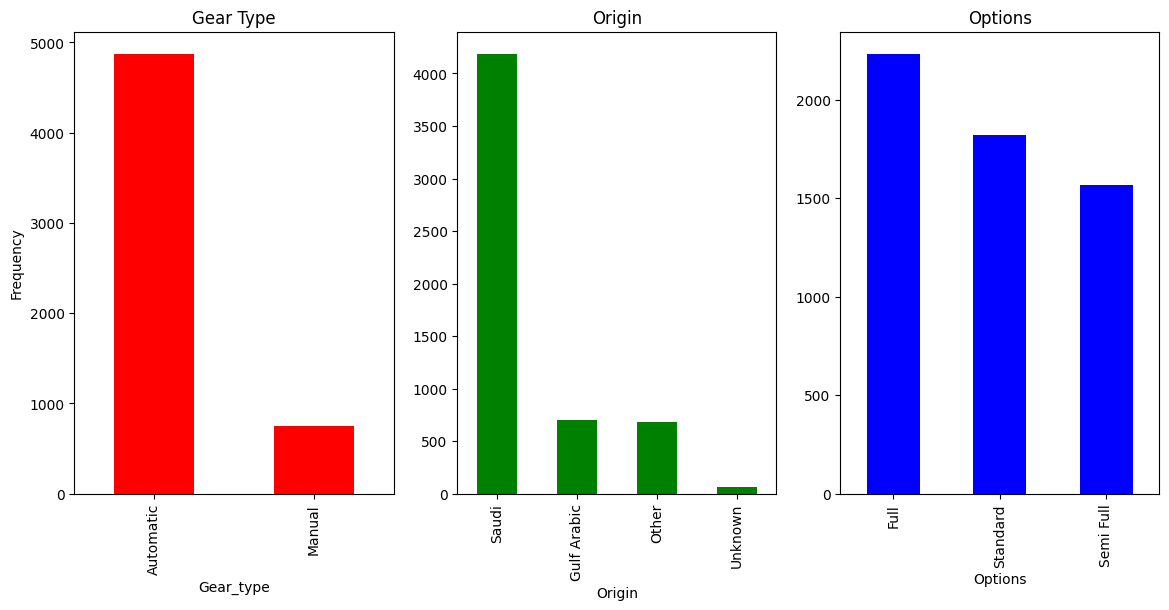

In [7]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt1 = df_SaudiCars.Gear_Type.value_counts().plot(kind= 'bar', color= 'red')
plt.title('Gear Type')
plt1.set(xlabel = 'Gear_type', ylabel='Frequency')

plt.subplot(1,3,2)
plt2 = df_SaudiCars.Origin.value_counts().plot(kind= 'bar', color= 'green')
plt.title('Origin')
plt2.set(xlabel = 'Origin')

plt.subplot(1,3,3)
plt3 = df_SaudiCars.Options.value_counts().plot(kind= 'bar', color= 'blue')
plt.title('Options')
plt3.set(xlabel = 'Options')

plt.show()

Insights:
- Jumlah mobil bekas yang terjual dengan transmisi 'Automatic' jauh lebih banyak dibandingkan dengan transmisi 'Manual'.
- Asal muasal mobil bekas paling banyak terjual berasal dari Saudi.
- Opsi kelengkapan mobil bekas 'Full' terlihat lebih banyak terjual dibandingkan mobil bekas dengan pilihan opsi lainnya.

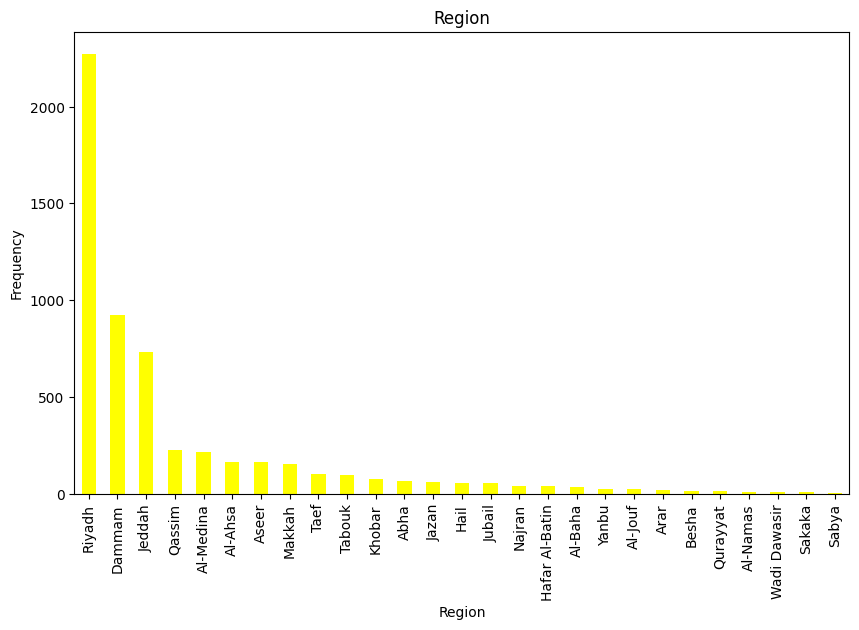

In [8]:
plt.figure(figsize=(10,6))

plt4 = df_SaudiCars.Region.value_counts().plot(kind= 'bar', color= 'yellow')
plt.title('Region')
plt4.set(xlabel = 'Region', ylabel='Frequency')

plt.show()

Insights:
- Total mobil bekas yang paling banyak terjual berlokasi di wilayah Riyadh dan paling sedikit terjual di wilayah Sabya. 

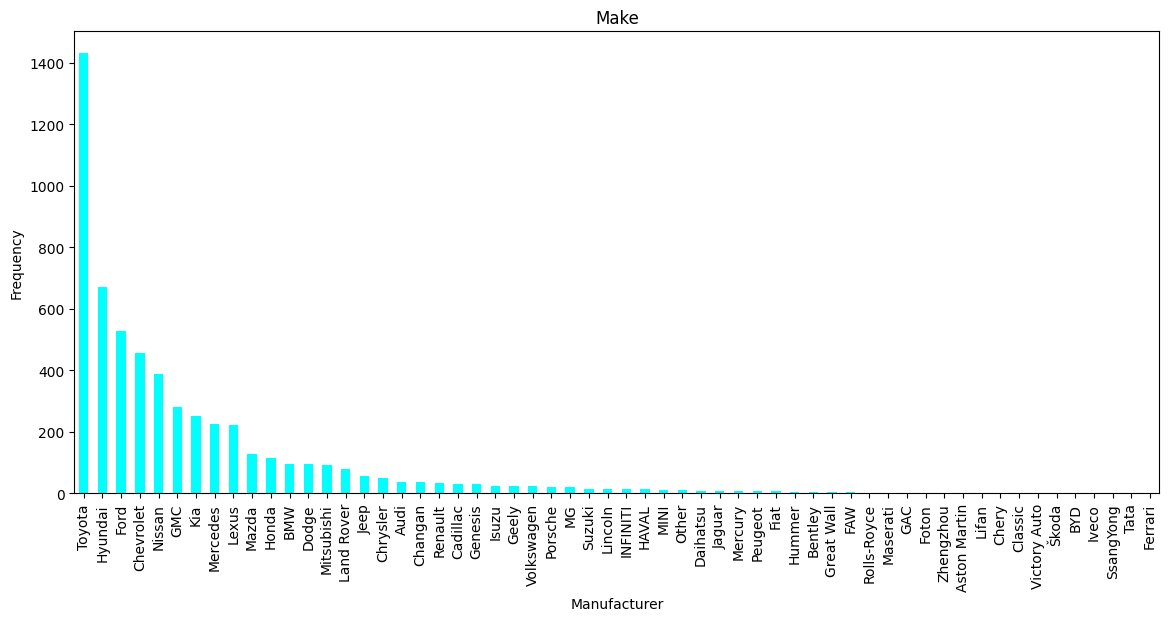

In [9]:
plt.figure(figsize=(14,6))

plt5 = df_SaudiCars.Make.value_counts().plot(kind= 'bar', color= 'cyan')
plt.title('Make')
plt5.set(xlabel = 'Manufacturer', ylabel='Frequency')

plt.show()

Insights:
- Toyota, Hyundai, dan Ford merupakan 3 perusahaan manufaktur yang paling diminati oleh pembeli mobil bekas.

<Figure size 2000x1000 with 0 Axes>

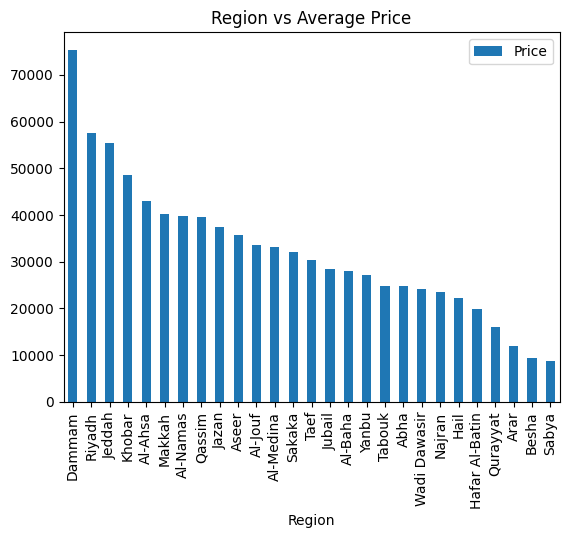

In [10]:
plt.figure(figsize=(20,10))
df_regPrice = pd.DataFrame(df_SaudiCars.groupby(['Region'])['Price'].mean().sort_values(ascending= False))
df_regPrice.plot.bar()
plt.title('Region vs Average Price')
plt.show()

- Kota Dammam, Riyadh, dan Jeddah merupakan 3 tempat dengan penjualan mobil terbanyak di Arab Saudi.

<Figure size 2500x600 with 0 Axes>

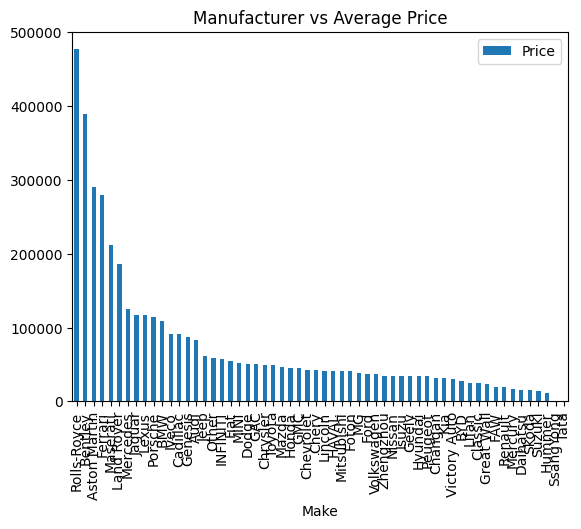

In [11]:
plt.figure(figsize=(25, 6))
df_makePrice = pd.DataFrame(df_SaudiCars.groupby(['Make'])['Price'].mean().sort_values(ascending=False))
df_makePrice.plot.bar()
plt.title('Manufacturer vs Average Price')
plt.show()

- Rolls-Royce, Bentley, dan Aston Martin merupakan 3 perusahaan manufaktur dengan rata-rata harga penjualan mobil bekas tertinggi di Arab Saudi.

## 3. Data Preprocessing

In [12]:
# Membuat duplikasi Dataframe
df_model = df_SaudiCars.copy()

In [13]:
# Check duplicate data
print("Number of duplicate rows:", sum(df_model.duplicated()))

Number of duplicate rows: 4


In [14]:
df_model.drop_duplicates(inplace=True)

# Re-check duplicate data
print("Number of duplicate rows: ", sum(df_model.duplicated()))

Number of duplicate rows:  0


In [15]:
# Check Missing Value
df_model.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [16]:
# Info Detail Untuk Setiap Fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Bronco, Prestige]"
1,Region,object,0,0.0,27,"[Qurayyat, Sakaka]"
2,Make,object,0,0.0,58,"[Foton, Mercury]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,50,"[2004, 1991]"
7,Engine_Size,float64,0,0.0,71,"[9.0, 8.5]"
8,Mileage,int64,0,0.0,1716,"[140641, 242]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


In [17]:
# Summary Statistics Untuk Atribut Numerikal 
df_model.describe()

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


- Dari keempat fitur numerikal di atas dapat terlihat bahwa nilai minimum pada fitur 'Price' dirasa tidak masuk akal. Nilai minimum dari sebuah harga penjualan mobil bernilai 0, hal ini menunjukkan bahwa mobil tersebut dapat dibeli secara gratis oleh pelanggan. Oleh sebab itu, supaya menghindari model dari kesalahan dalam menginterpretasi data, maka baris data yang memiliki nilai 'Price' == 0 akan dieliminasi.

In [18]:
# Jumlah Baris Data Dengan Nilai 'Price' == 0
df_model[df_model['Price'] == 0]['Price'].count()


1796

In [19]:
# Drop Baris Data Dengan Nilai 'Price' == 0
df_model = df_model[df_model['Price'] != 0]
df_model.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500
10,C300,Makkah,Chrysler,Automatic,Saudi,Full,2013,5.7,200,False,55000
11,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2011,4.6,79000,False,145000
12,LS,Dammam,Lexus,Automatic,Saudi,Full,2008,4.6,299000,False,38000


In [20]:
# Memeriksa Kembali Apakah Ada Nilai Minimum Fitur 'Price' Yang Masih Tidak Masuk Akal
df_model.sort_values(by= 'Price', ascending= 1, inplace= True)
df_model.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,False,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,False,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,False,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,False,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,False,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,False,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,False,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,False,1002
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,False,1010


In [21]:
df_model[df_model['Price'] == 1]['Price'].count()

1

- Setelah dilakukan pemeriksaan ulang, dapat terlihat bahwa masih ada 1 baris data dengan nilai yang tidak masuk akal, yaitu 'Price' == 1. Nilai jual ini sama saja dengan memberikan mobil secara cuma-cuma kepada pelanggan. Oleh karena itu, baris data dengan nilai 'Price' == 1 akan juga dieliminasi.

In [22]:
df_model = df_model[df_model['Price'] != 1]
df_model.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,False,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,False,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,False,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,False,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,False,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,False,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,False,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,False,1002
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,False,1010
5424,Yaris,Najran,Toyota,Automatic,Saudi,Full,2018,1.5,169000,False,1046


#### Outliers Detection

- Dengan banyaknya jumlah outliers pada suatu data, hal tersebut dapat memengaruhi hasil dari analisis dan pemodelan yang sedang dibangun. Terdapat beberapa hal yang dapat menjadi pertimbangan sebelum diputuskan treatment apa yang akan diterapkan sesuai dengan data, salah satunya adalah dengan mempertimbangkan sisi domain knowledge.

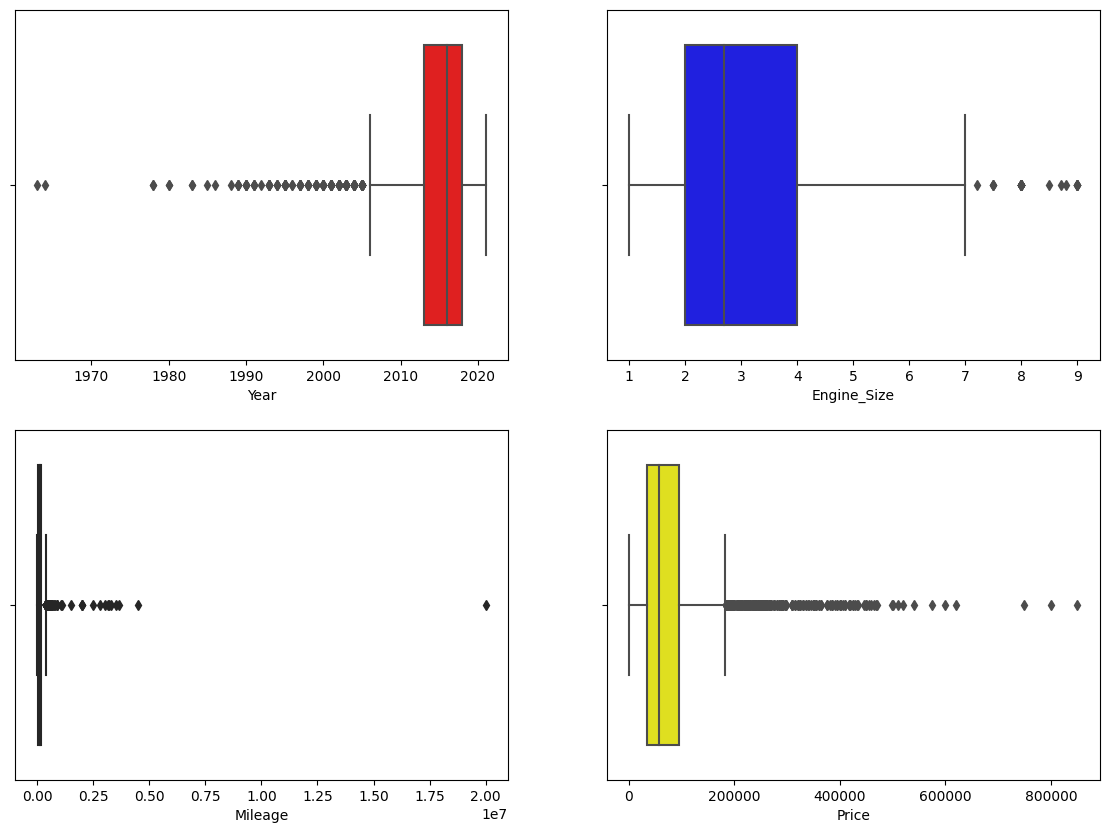

In [23]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.boxplot(data= df_model, x= 'Year', color='red')

plt.subplot(2,2,2)
sns.boxplot(data= df_model, x= 'Engine_Size', color='blue')

plt.subplot(2,2,3)
sns.boxplot(data= df_model, x= 'Mileage', color='green')

plt.subplot(2,2,4)
sns.boxplot(data= df_model, x= 'Price', color='yellow')

plt.show()

- Berdasarkan plot di atas dapat dilihat bahwa terdapat outliers pada masing-masing fitur. Untuk menangani permasalahan ini, akan dilakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara domain knowledge dan juga hasil dari metode IQR. Selanjutnya, model yang dihasilkan hanya sebatas memprediksi listing baru pada rentang nilai-nilai data berdasarkan 'clean dataset' ini saja. Di luar rentang data yang sudah dibersihkan, hasil prediksi dari model akan bias dan tidak bisa dijamin keabsahannya.

In [24]:
# Membuat Fungsi Untuk Memeriksa Outliers
def search_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 -q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'Lower_Limit: {lower_limit}')
    print(f'Upper_Limit: {upper_limit}')

In [25]:
# Memeriksa Outliers Pada Fitur 'Year'
search_anomalies(df_model['Year'])

IQR: 5.0
Lower_Limit: 2005.5
Upper_Limit: 2025.5


In [26]:
# Memeriksa Outliers Pada Fitur 'Engine_Size'
search_anomalies(df_model['Engine_Size'])

IQR: 2.0
Lower_Limit: -1.0
Upper_Limit: 7.0


In [27]:
# Memeriksa Outliers Pada Fitur 'Mileage'
search_anomalies(df_model['Mileage'])

IQR: 135000.0
Lower_Limit: -154500.0
Upper_Limit: 385500.0


In [28]:
# Memeriksa Outliers Pada Fitur 'Price'
search_anomalies(df_model['Price'])

IQR: 59500.0
Lower_Limit: -54250.0
Upper_Limit: 183750.0


#### Year

In [29]:
# Memeriksa Kolom 'Year' Dengan Statistik Deskriptif
df_model['Year'].describe()

count    3823.000000
mean     2014.850118
std         5.111144
min      1963.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

In [30]:
# Memeriksa Apakah Terdapat Nilai 'Year' > 2025.5
df_model[df_model['Year'] > 2025.5].count()['Year']

0

- Berdasarkan metode IQR, batas atas yang didapat untuk fitur 'Year' adalah 2025,5. Pada hasil pemeriksaan, tidak ditemukan titik data dengan nilai yang lebih besar daripada 2025,5. Oleh sebab itu, data yang akan digunakan adalah nilai fitur 'Year' yang kurang dari atau sama dengan tahun 2025,5.

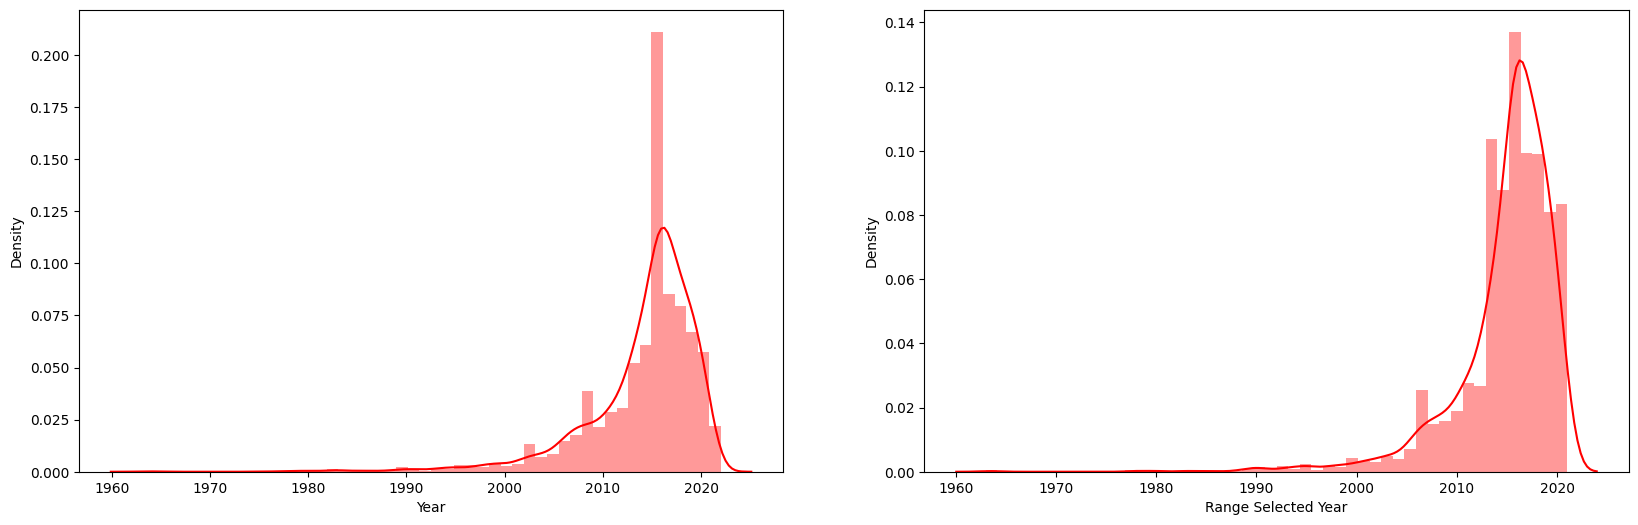

In [31]:
# Melakukan Filter Data 
df_model = df_model[(df_model['Year'] <= 2025.5)]

# Distribusi Plot Sebelum & Sesudah Melakukan Filter
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df_SaudiCars['Year'], ax= axes[0], color='red')
sns.distplot(df_model['Year'], ax= axes[1], color='red')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year');

In [32]:
# Memeriksa Kolom 'Year' Dengan Statistik Deskriptif Setelah Dilakukan Filter
df_model['Year'].describe()

count    3823.000000
mean     2014.850118
std         5.111144
min      1963.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

#### Engine Size

In [33]:
# Memeriksa Kolom 'Engine_Size' Dengan Statistik Deskriptif
df_model['Engine_Size'].describe()

count    3823.000000
mean        3.180565
std         1.458620
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

In [34]:
# Memeriksa Apakah Terdapat Nilai 'Engine_Size' > 7
df_model[df_model['Engine_Size'] > 7].count()['Engine_Size']

30

- Dapat terlihat bahwa 75% dari data di kolom 'Engine_Size' adalah kurang dari 4, sedangkan untuk nilai maksimumnya adalah 9. Terdapat kecenderungan data dengan ekor memanjang ke sisi kanan pada distribusi (positive skewness). Data tersebut terdiri atas 26 titik dengan nilai 'Engine_Size' yang lebih besar dari 7 (batas atas berdasarkan metode IQR). Oleh sebab itu, titik data 'Engine_Size' dengan nilai lebih besar dari 7 tidak akan diikutsertakan dalam pemodelan, sehingga akan mengurangi kemiringan. Hal ini tentu akan menjadi batasan baru bagi model yang akan dibangun.
- Perlu untuk diingat juga bahwa batasan baru ini bisa berpengaruh terhadap akurasi dan kemampuan generalisasi model, terutama apabila terdapat tren atau pola penting dalam rentang data 'Engine_Size' tinggi yang tidak ditangkap di dalam data. Oleh karena itu, perlu dipertimbangkan kembali pendekatan alternatif yang dapat menangani skewness dan outlier, seperti mengganti data atau menerapkan teknik regresi yang lebih toleran terhadap outlier.

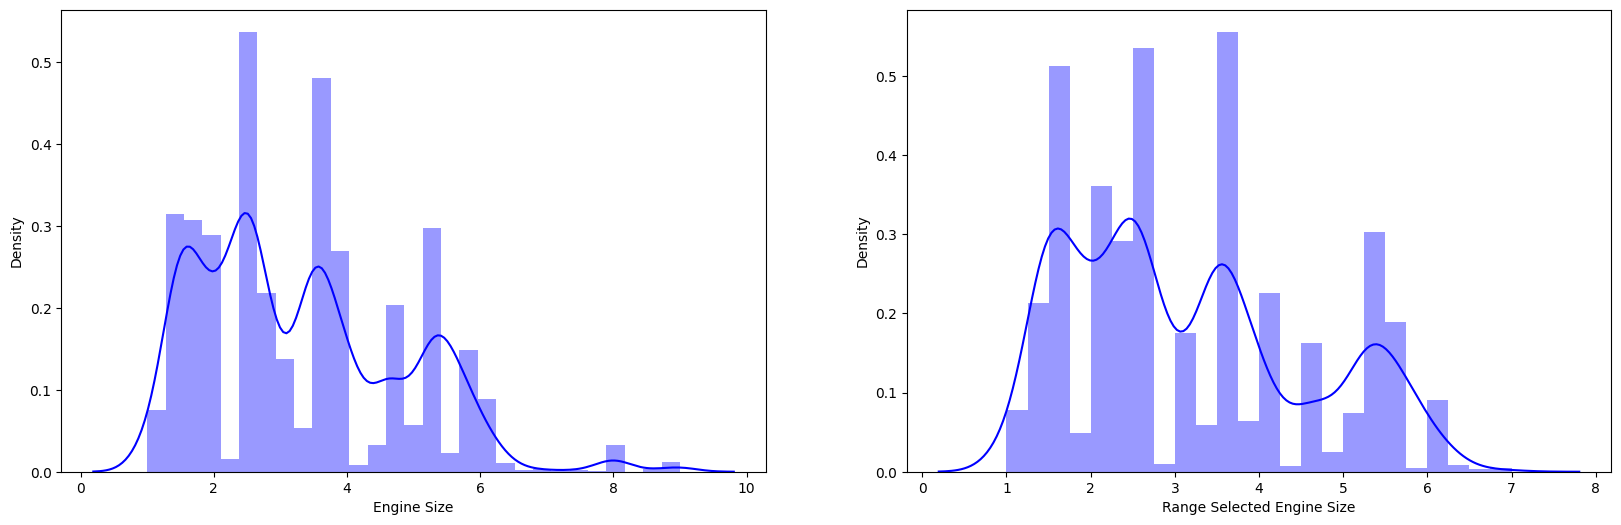

In [35]:
# Melakukan Filter Data 
df_model = df_model[(df_model['Engine_Size'] <= 7)]

# Distribusi Plot Sebelum & Sesudah Melakukan Filter
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df_SaudiCars['Engine_Size'], ax= axes[0], color='blue')
sns.distplot(df_model['Engine_Size'], ax= axes[1], color='blue')
axes[0].set_xlabel('Engine Size')
axes[1].set_xlabel('Range Selected Engine Size');

In [36]:
# Memeriksa Kolom 'Engine_Size' Dengan Statistik Deskriptif Setelah Dilakukan Filter
df_model['Engine_Size'].describe()

count    3793.000000
mean        3.140944
std         1.393656
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         7.000000
Name: Engine_Size, dtype: float64

#### Mileage

In [37]:
# Memeriksa Kolom 'Mileage' Dengan Statistik Deskriptif
df_model['Mileage'].describe()

count    3.793000e+03
mean     1.428055e+05
std      3.798194e+05
min      1.000000e+02
25%      4.851100e+04
50%      1.030000e+05
75%      1.830000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [38]:
# Memeriksa Apakah Terdapat Nilai 'Mileage' > 385500
df_model[df_model['Mileage'] > 385500].count()['Mileage']

131

- Dapat terlihat bahwa 75% dari data di kolom 'Mileage' adalah kurang dari 1.900000e+05, sedangkan untuk nilai maksimumnya adalah 2.000000e+07. Terdapat kecenderungan data dengan ekor memanjang ke sisi kanan pada distribusi (positive skewness). Data tersebut terdiri atas 130 titik dengan nilai 'Mileage' yang lebih besar dari 385.500 (batas atas berdasarkan metode IQR). Oleh sebab itu, titik data 'Mileage' dengan nilai lebih besar dari 385.500 tidak akan diikutsertakan dalam pemodelan, sehingga akan mengurangi kemiringan. Hal ini tentu akan menjadi batasan baru bagi model yang akan dibangun.
- Perlu untuk diingat juga bahwa batasan baru ini bisa berpengaruh terhadap akurasi dan kemampuan generalisasi model, terutama apabila terdapat tren atau pola penting dalam rentang data 'Mileage' tinggi yang tidak ditangkap di dalam data. Oleh karena itu, perlu dipertimbangkan kembali pendekatan alternatif yang dapat menangani skewness dan outlier, seperti mengganti data atau menerapkan teknik regresi yang lebih toleran terhadap outlier.

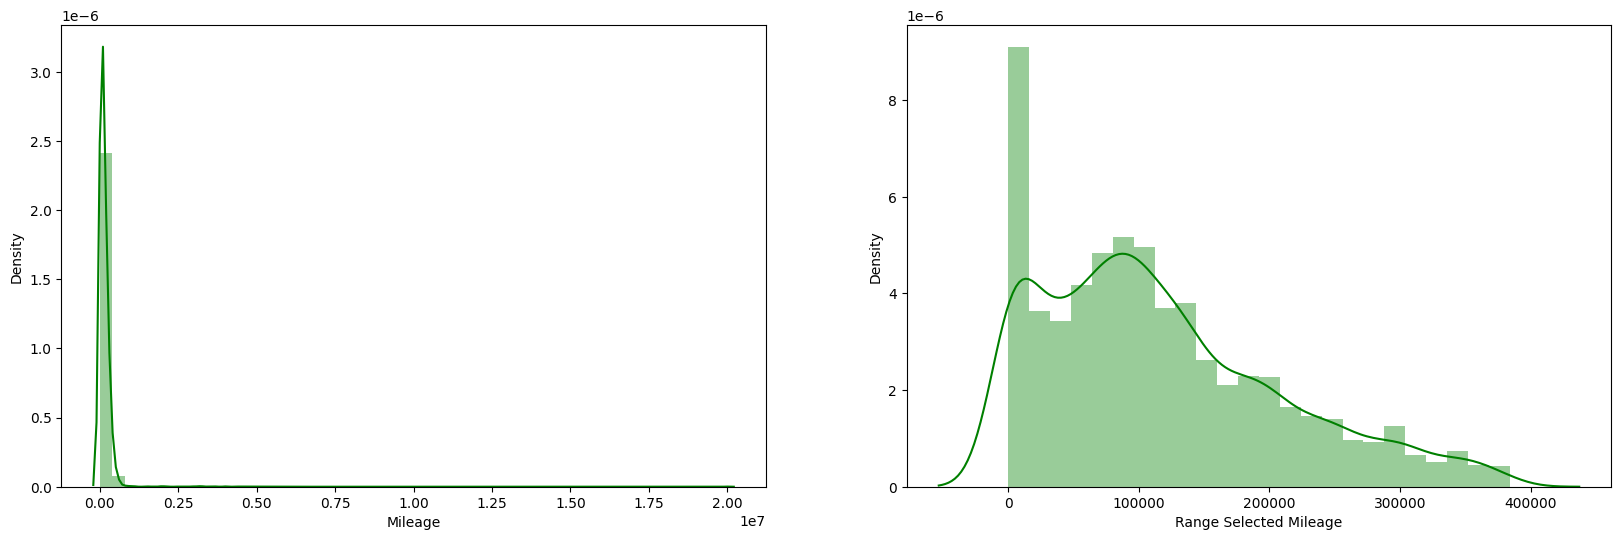

In [39]:
# Melakukan Filter Data 
df_model = df_model[(df_model['Mileage'] < 385500)]

# Distribusi Plot Sebelum & Sesudah Melakukan Filter
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df_SaudiCars['Mileage'], ax= axes[0], color='green')
sns.distplot(df_model['Mileage'], ax= axes[1], color='green')
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

In [40]:
# Memeriksa Kolom 'Mileage' Dengan Statistik Deskriptif Setelah Dilakukan Filter
df_model['Mileage'].describe()

count      3662.000000
mean     116795.552703
std       91684.242192
min         100.000000
25%       46000.000000
50%       99000.000000
75%      173000.000000
max      384000.000000
Name: Mileage, dtype: float64

#### Price

In [41]:
# Memeriksa Kolom 'Price' Dengan Statistik Deskriptif
df_model['Price'].describe()

count      3662.000000
mean      79335.661387
std       72981.232021
min         500.000000
25%       36500.000000
50%       59000.000000
75%       95000.000000
max      850000.000000
Name: Price, dtype: float64

In [42]:
# Memeriksa Apakah Terdapat Nilai 'Price' > $183750
df_model[df_model['Price'] > 183750.0].count()['Price']

254

- Dapat terlihat bahwa 75% dari data di kolom 'Price' adalah kurang dari 94.500, sedangkan untuk nilai maksimumnya adalah 850.000. Terdapat kecenderungan data dengan ekor memanjang ke sisi kanan pada distribusi (positive skewness). Data tersebut terdiri atas 259 titik dengan nilai 'Price' yang lebih besar dari 183.750 (batas atas berdasarkan metode IQR). Oleh sebab itu, titik data 'Price' dengan nilai lebih besar dari 183.750 tidak akan diikutsertakan dalam pemodelan, sehingga akan mengurangi kemiringan. Hal ini tentu akan menjadi batasan baru bagi model yang akan dibangun.
- Perlu untuk diingat juga bahwa batasan baru ini bisa berpengaruh terhadap akurasi dan kemampuan generalisasi model, terutama apabila terdapat tren atau pola penting dalam rentang data 'Price' tinggi yang tidak ditangkap di dalam data. Oleh karena itu, perlu dipertimbangkan kembali pendekatan alternatif yang dapat menangani skewness dan outlier, seperti mengganti data atau menerapkan teknik regresi yang lebih toleran terhadap outlier.

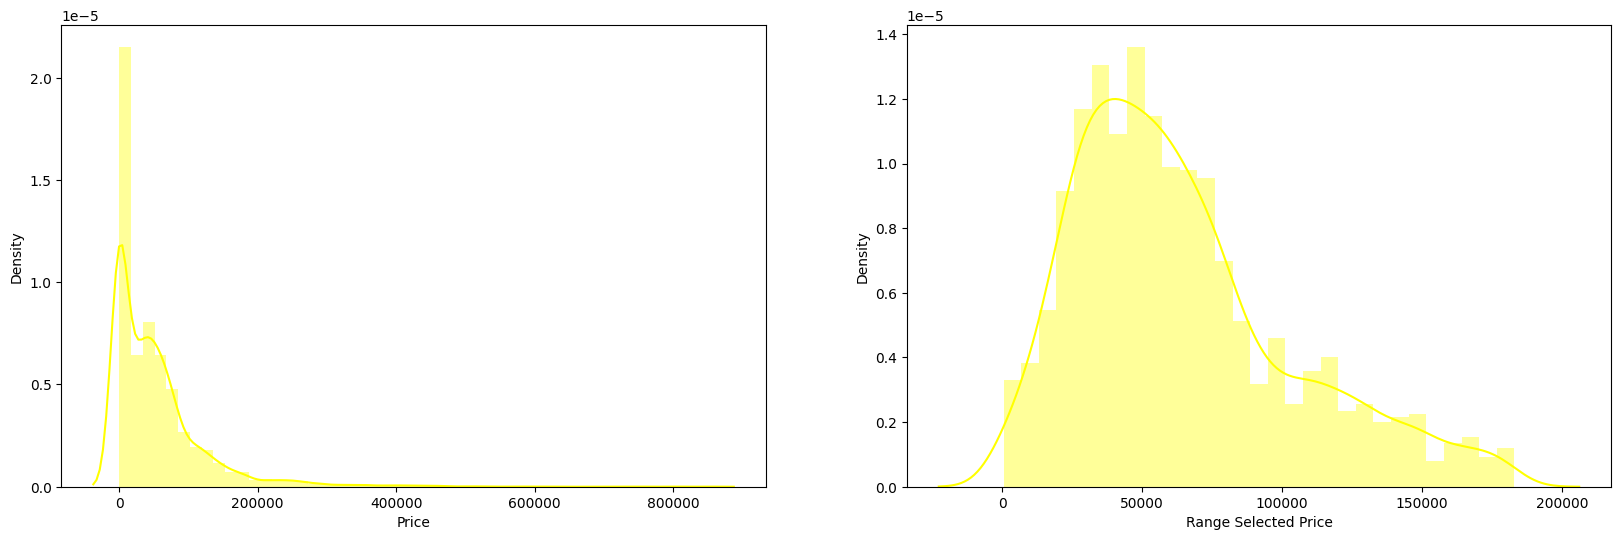

In [43]:
# Melakukan Filter Data 
df_model = df_model[(df_model['Price'] <= 183750)]

# Distribusi Plot Sebelum & Sesudah Melakukan Filter
fig, axes = plt.subplots(1,2, figsize=(20, 6))
sns.distplot(df_SaudiCars['Price'], ax= axes[0], color='yellow')
sns.distplot(df_model['Price'], ax= axes[1], color='yellow')
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [44]:
# Memeriksa Kolom 'Price' Dengan Statistik Deskriptif Setelah Dilakukan Filter
df_model['Price'].describe()

count      3408.000000
mean      64003.166667
std       39334.004532
min         500.000000
25%       35000.000000
50%       55000.000000
75%       83000.000000
max      183000.000000
Name: Price, dtype: float64

In [45]:
# Memeriksa Kolom 'Region' Dengan Statistik Deskriptif
df_model['Region'].describe()

count       3408
unique        27
top       Riyadh
freq        1436
Name: Region, dtype: object

In [46]:
# Memeriksa Kolom 'Type' Dengan Statistik Deskriptif
df_model['Make'].describe()

count       3408
unique        53
top       Toyota
freq         776
Name: Make, dtype: object

In [47]:
# Memeriksa Kolom 'Gear_Type' Dengan Statistik Deskriptif
df_model['Gear_Type'].describe()

count          3408
unique            2
top       Automatic
freq           3057
Name: Gear_Type, dtype: object

In [48]:
# Memeriksa Kolom 'Options' Dengan Statistik Deskriptif
df_model['Options'].describe()

count         3408
unique           3
top       Standard
freq          1268
Name: Options, dtype: object

### Feature Selection
Terdapat beberapa pertimbangan sebelum dilakukan proses pemilihan pada kolom atau fitur. Sebagai bahan pertimbangan, pada tahap awal ini digunakan domain knowledge untuk memutuskan fitur apa saja yang dirasa tidak memiliki relevansi terhadap model nantinya.

- Sebelum memulai tahap ini dengan metode korelasi, feature 'Negotiable' akan dieliminasi terlebih dahulu dari dataset. Berdasarkan domain knowledge, fitur ini dirasa tidak memiliki relevansi untuk membangun model. Fitur tersebut hanya berisikan type data Boolean, dimana nilai 'True' menunjukkan bahwa harga mobil dapat dinegosiasi dan nilai 'False' menunjukkan arti sebaliknya. Sedangkan model yang ingin dibuat adalah untuk memprediksi harga awal dari setiap mobil bekas yang akan dijual, bukan harga dari setiap mobil setelah proses negosiasi.

In [49]:
# Mengeliminasi Fitur 'Negotiable' dari Dataset
df_model.drop(columns=['Negotiable'], inplace = True)

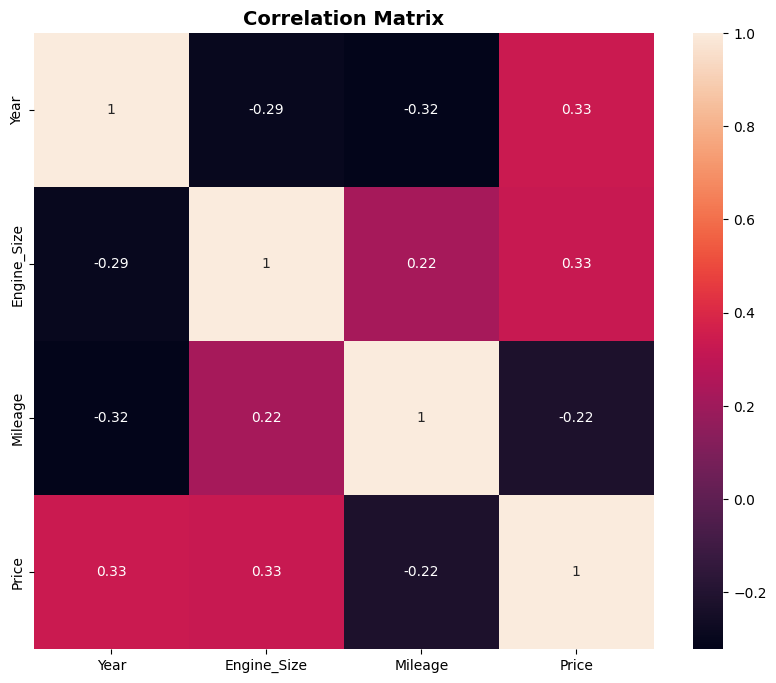

In [50]:
# Memeriksa Koefisien Korelasi Untuk Melihat Variabel Apa Saja Yang Berkorelasi Tinggi
plt.figure(figsize=(10,8))
sns.heatmap(df_model.corr(), annot=True)
plt.title('Correlation Matrix', size= 14, weight= 'bold');
plt.show()

Berdasarkan Heatmap di atas:
- Matriks korelasi menunjukkan bahwa masing-masing fitur ('Year', 'Engine_Size', 'Mileage') tidak ada  yang memiliki korelasi yang kuat dengan fitur 'Price'.
- Namun, dapat terlihat bahwa fitur 'Year' dan 'Engine_Size' berkorelasi positif dengan fitur 'Price', sedangkan fitur 'Mileage' berkorelasi negatif.

In [51]:
import seaborn as sns
import dython
from dython.nominal import correlation_ratio

In [52]:
objects = df_model.columns[df_model.dtypes == 'object'] 

In [53]:
features = []

for i in objects:
    corr = round(correlation_ratio(df_model[i], df_model['Price']), 2)
    features.append(corr)

In [54]:
df_cor_ratio = pd.DataFrame(data = [features], columns = [objects], index=['Price'])

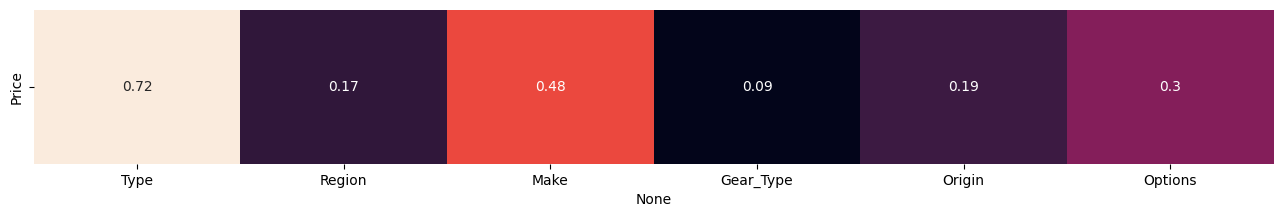

In [55]:
plt.figure(figsize=(16,2))
sns.heatmap(df_cor_ratio, annot=True, cbar =False)
plt.show()

- Berdasarkan hasil pengujian rasio korelasi di atas dapat terlihat bahwa fitur 'Type' memiliki nilai korelasi yang baik, sedangkan fitur lainnya kurang begitu baik. Maka dari itu diputuskan akan ada beberapa fitur yang dieliminasi dari dataset, yaitu fitur 'Make' dan 'Origin'. 
- Fitur 'Make' akan dieliminasi karena fitur tersebut dan juga fitur 'Type' menjelaskan sebuah hal yang serupa. Fitur 'Type' terdiri atas masing-masing nama mobil yang tidak mungkin memiliki nama yang sama, sedangkan fitur 'Make' merupakan nama perusahaan manufaktur yang memproduksi mobil-mobil tersebut. Terdapat kemungkinan bahwa 1 perusahaan memproduksi lebih dari satu nama mobil. 
- Fitur 'Origin' juga akan dieliminasi karena memiliki nilai korelasi yang rendah dan asal dari sebuah mobil dirasa tidak akan berpengaruh banyak terhadap harga mobil bekas. Sedangkan fitur 'Region' dirasa lebih penting, karena data-data pada fitur tersebut merupakan nama wilayah dimana mobil bekas ini terjual.

In [56]:
# Drop Fitur 'Make' dan 'Origin'
df_model = df_model.drop(['Make', 'Origin'], axis=1)
df_model.head(10)

,Type,Region,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,G80,Riyadh,Automatic,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Automatic,Standard,2018,1.5,100000,850
5128,Rio,Arar,Automatic,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Automatic,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,Automatic,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Automatic,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,Automatic,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Automatic,Standard,2020,1.6,48563,1002
46,Elantra,Abha,Automatic,Semi Full,2020,2.0,27000,1010
5424,Yaris,Najran,Automatic,Full,2018,1.5,169000,1046


### Clean Dataset

In [57]:
df_model

,Type,Region,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,G80,Riyadh,Automatic,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Automatic,Standard,2018,1.5,100000,850
5128,Rio,Arar,Automatic,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Automatic,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,Automatic,Standard,2020,1.5,41000,988
...,...,...,...,...,...,...,...,...
1662,Land Cruiser,Dammam,Automatic,Full,2015,5.7,119000,180000
2522,Wrangler,Riyadh,Automatic,Full,2019,3.6,16000,181000
2605,Land Cruiser,Dammam,Automatic,Full,2017,4.0,78000,182000
3396,GL,Makkah,Automatic,Full,2015,5.0,32000,183000


In [58]:
# Memeriksa Kembali Info Dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3408 entries, 3992 to 2842
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3408 non-null   object 
 1   Region       3408 non-null   object 
 2   Gear_Type    3408 non-null   object 
 3   Options      3408 non-null   object 
 4   Year         3408 non-null   int64  
 5   Engine_Size  3408 non-null   float64
 6   Mileage      3408 non-null   int64  
 7   Price        3408 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 239.6+ KB


- Setelah data dibersihkan, tersisa 3.408 baris data yang akan dipakai dalam membangun model. Hal Ini menunjukkan bahwa terdapat hampir 40% data sudah tereliminasi pada tahap-tahap sebelumnya.

### Feature Engineering

#### Encoding

Setelah dilakukan proses Data Cleaning, masih terdapat beberapa fitur kategorikal yang dirasa dapat membantu pembuatan model. Oleh karena itu, fitur-fitur kategorikal tersebut harus diubah terlebih dahulu menjadi fitur numerikal agar bisa digunakan dalam pembuatan model. Fitur-fitur tersebut adalah 'Type', 'Region', 'Gear_Type', dan 'Options'.

- Seperti yang kita ketahui, harga sebuah mobil sangat bergantung pada nama dari mobil tersebut, karena masing-masing mobil memiliki kekurangan dan keunggulannya masing-masing. Tidak mungkin ada 2 nama mobil yang berbeda, tetapi memiliki keunggulan dan kekurangan yang hampir sama 100%. Oleh karena itu, harga masing-masing mobil pun pasti berbeda juga.
- Wilayah dari penjualan mobil juga menjadi salah satu faktor yang mempengaruhi harga jual. Semakin sulit wilayah tersebut untuk diakses, pada umumnya harga jual mobil di wilayah tersebut juga akan semakin meningkat. 
- Type transmisi dari mobil juga berdampak pada harga dari mobil itu sendiri. Pada umumnya, mobil dengan transmisi automatic akan lebih mahal dibandingkan dengan mobil dengan transmisi manual.
- Harga mobil juga sangat tergantung pada fitur dan kelengkapan dari mobil itu sendiri ('Options') apakah Full, Semi Full, atau Standar. Semakin lengkap suatu fitur pada mobil, maka semakin mahal juga harga jualnya.

In [59]:
# Import Library Yang Dibutuhkan Untuk Encoding
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [60]:
# Membuat Mapping Ordinal Pada Fitur 'Options'
ordinal_mapping = [{
    'col' : 'Options',
    'mapping' : {None: 0, 'Standard': 1, 'Semi Full': 2, 'Full': 3}
}]

ordinal_encoder = ce.OrdinalEncoder(cols = 'Options', mapping= ordinal_mapping)

In [61]:
## Mengubah Fitur Kategorikal Menjadi Fitur Numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['Region', 'Gear_Type']),
    ('Ordinal', ordinal_encoder, ['Options']),
    ('Binary', ce.BinaryEncoder(), ['Type'])
], remainder='passthrough')

## 4. Modeling

In [62]:
# Import Library Yang Dibutuhkan Untuk Modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Data Splitting

In [63]:
# Memisahkan Independen Variabel Dengan Target
X = df_model.drop(columns='Price', axis=1)
y = df_model['Price']

#### Train & Test Splitting

In [64]:
# Memisahkan Data Training Dan Data Test Dengan Proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size= 0.2,
    random_state= 2023)

In [65]:
X_train, X_test, y_train, y_test

(              Type  Region  Gear_Type    Options  Year  Engine_Size  Mileage
 2425  Land Cruiser  Dammam  Automatic       Full  2006          4.5   199000
 5168      Victoria  Riyadh  Automatic  Semi Full  1999          1.0     4000
 637         Fusion  Dammam  Automatic  Semi Full  2016          1.2    99200
 1207        Altima  Jeddah  Automatic   Standard  2017          2.5    88000
 4992        Accord  Riyadh  Automatic  Semi Full  2014          2.4    59000
 ...            ...     ...        ...        ...   ...          ...      ...
 121       Senta fe  Riyadh  Automatic  Semi Full  2016          3.3   126000
 5057      Explorer  Riyadh  Automatic       Full  2016          3.5    93000
 2057        Tucson  Jeddah  Automatic  Semi Full  2020          2.0    22000
 1580       Odyssey  Riyadh  Automatic  Semi Full  2016          3.5   185000
 3904        Sonata  Jeddah  Automatic  Semi Full  2017          2.4   240000
 
 [2726 rows x 7 columns],
                      Type  Region  

In [66]:
X_train.shape

(2726, 7)

In [67]:
y_train.shape

(2726,)

#### Benchmark Model

In [68]:
# Algoritma Yang Akan Digunakan
LR = LinearRegression()
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor(random_state=2023)
RF = RandomForestRegressor(random_state=2023)
ADA = AdaBoostRegressor(random_state=2023)
GB = GradientBoostingRegressor(random_state=2023)
XGB = XGBRegressor(random_state=2023)

log_LR = TransformedTargetRegressor(LR, func=np.log, inverse_func=np.exp)
log_KNN = TransformedTargetRegressor(KNN, func=np.log, inverse_func=np.exp)
log_DT = TransformedTargetRegressor(DT, func=np.log, inverse_func=np.exp)
log_RF = TransformedTargetRegressor(RF, func=np.log, inverse_func=np.exp)
log_ADA = TransformedTargetRegressor(ADA, func=np.log, inverse_func=np.exp)
log_GB = TransformedTargetRegressor(GB, func=np.log, inverse_func=np.exp)
log_XGB = TransformedTargetRegressor(XGB, func=np.log, inverse_func=np.exp)

# Scaling Data
scaler_data = StandardScaler()

# Kandidat Algoritma
models = [log_LR, log_KNN, log_DT, log_RF, log_ADA, log_GB, log_XGB]

score_R2 = []

score_RMSE = []
mean_RMSE = []
std_RMSE = []

score_MAE = []
mean_MAE = []
std_MAE = []

score_MAPE = []
mean_MAPE = []
std_MAPE = []

# Mencari Algoritma Terbaik Berdasarkan Nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler_data),
        ('model', i)
    ])

    # RMSE
    model_cv_RMSE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_RMSE, i)

    score_RMSE.append(model_cv_RMSE.mean())
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_MAE, i)

    score_MAE.append(model_cv_MAE.mean())
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_MAPE, i)

    score_MAPE.append(model_cv_MAPE.mean())
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

    # R-square
    R2_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring="r2", 
        error_score='raise')
    
    print(R2_cv, i)

    score_R2.append(R2_cv.mean())

[-32244.51002731 -31575.49080742 -30476.50716034 -29117.20571818
 -28693.26276517] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-22822.97216362 -21523.55092481 -21663.66694186 -20540.18220053
 -20714.48728305] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.27536529 -0.88534343 -1.66129829 -1.03745797 -0.71786423] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.36493239 0.38570987 0.38976658 0.42533444 0.43991819] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-30442.56016764 -30954.22982441 -32176.75625671 -30762.59247556
 -29586.32719004] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           re

In [69]:
# Evaluasi Hasil Dari 7 Kandidat Algoritma Yang Digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Ada Boost Regressor', 'Gradient Boosting Regressor','XGBoost Regressor'],
    'R-Square' : score_R2,
    'RMSE': score_RMSE,
    'MAE': score_MAE,
    'MAPE': score_MAPE,
})

,Model,R-Square,RMSE,MAE,MAPE
0,Linear Regression,0.401132,-30421.395296,-21452.971903,-1.115466
1,KNN Regressor,0.385283,-30784.493183,-21110.975083,-1.115550
2,DecisionTree Regressor,0.344690,-31784.364714,-19876.636729,-1.163805
3,RandomForest Regressor,0.584568,-25322.598707,-15849.195738,-0.990276
4,Ada Boost Regressor,-0.120035,-41593.127166,-28991.858044,-0.777963
5,Gradient Boosting Regressor,0.527617,-27004.551383,-17777.310802,-0.951275
6,XGBoost Regressor,0.552515,-26277.689203,-16354.101959,-0.962545


- Berdasarkan perbandingan model di atas, RandomForest Regressor menghasilkan nilai R-square, RMSE, dan MAE yang sedikit lebih baik dibandingkan dengan XGBoost Regressor. Namun berdasarkan nilai MAPE, XGBoost Regressor memiliki nilai MAPE yang lebih baik dibandingkan dengan nilai dari RandomForest Regressor.
- Oleh karena itu, maka akan dilakukan test set kembali menggunakan 2 model benchmark terbaik berdasarkan tabel perbandingan di atas, yaitu RandomForest Regressor dan XGBoost Regressor.

In [70]:
# 2 Best Benchmark Models
models = {
    'XGBoost Regressor': XGBRegressor(random_state=2023),
    'RandomForest Regressor': RandomForestRegressor(random_state=2023)
}

score_R2 = []
score_rmse = []
score_mae = []
score_mape = []

# TEST SET PREDICTION
for i in models:
    
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler_data),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_R2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R-Square': score_R2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,R-Square,RMSE,MAE,MAPE
XGBoost Regressor,0.605058,24630.259371,15556.166456,1.045573
RandomForest Regressor,0.604564,24645.661253,15502.779629,1.048136


- Setelah dilakukan uji benchmark kepada 2 model terbaik, dapat terlihat bahwa nilai R-square, RMSE, dan MAPE pada model XGBoost Regressor lebih baik dibandingkan nilai dari model RandomForest Regressor.
- Oleh sebab itu, maka diputuskan untuk menggunakan XGBoost Regressor sebagai model final. Tahap berikutnya akan dilakukan Hyperparameter Tuning pada model XGBoost.

#### Hyperparameter Tuning

Hyperparameter Tuning akan digunakan sebagai model akhir dengan harapan dapat memberikan peningkatan kinerja yang lebih baik dibandingkan dengan model sebelum dilakukan proses tuning.

In [71]:
# Tree Depth
max_depth = list(np.arange(1, 11))

# Learning Rate
learning_rate = list(np.arange(1, 100)/100)

# Tree Estimators
n_estimators = list(np.arange(100, 201))

# Tree Rows (Persentase (%) dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, maka semakin sederhana modelnya

# Tree Features (Persentase (%) dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, maka semakin sederhana modelnya


# Hyperparam space untuk XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [72]:
# Model Dengan Hyperparameter Tuning
xgb = XGBRegressor(random_state=2023, verbosity=0)

# Membuat Rantai Algoritma
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler_data),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

# Hyperparameter Tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 2023  
)

In [73]:
# Fitting Data Training Untuk Mencari Parameter Terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Region',
                                                                                'Gear_Type']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols='Options',
                                                                                              mapping=[{'col': 'Options',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'm...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2023, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [74]:
# Menamplikan Hasil Tuning ke Dalam Dataframe. Diurutkan Berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
13,1.262726,0.010058,0.015673,0.000936,0.7,0.059948,144,9,0.06,7,...,940.579599,1,-1.315619,-0.997080,-1.828965,-0.976673,-0.648982,-1.153464,0.398198,2
34,0.889229,0.013282,0.015253,0.002291,0.8,0.464159,173,7,0.16,5,...,884.310171,2,-1.430469,-0.995149,-1.736370,-0.933404,-0.701404,-1.159359,0.372608,3
17,0.890813,0.013896,0.014306,0.001481,0.8,0.021544,145,7,0.17,2,...,885.287430,3,-1.292401,-0.971184,-1.874086,-1.025149,-0.710266,-1.174617,0.395595,6
45,0.580160,0.012199,0.011071,0.001679,0.7,0.16681,176,5,0.1,3,...,1017.934045,5,-1.378899,-0.973419,-1.902195,-0.946020,-0.738681,-1.187843,0.413038,7
14,1.082289,0.027000,0.015779,0.001831,0.4,0.059948,166,8,0.11,3,...,866.103025,4,-1.335840,-0.973294,-1.794018,-0.990737,-0.716411,-1.162060,0.372333,4


In [75]:
# Memeriksa Nilai Skor dan Params Terbaik
print('XGBoost Regressor')
print('Best XGB Score :', random_xgb.best_score_)
print('Best XGB Params :', random_xgb.best_params_)

XGBoost Regressor
Best XGB Score : -21627.93360879928
Best XGB Params : {'model__subsample': 0.7, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 144, 'model__max_depth': 9, 'model__learning_rate': 0.06, 'model__gamma': 7, 'model__colsample_bytree': 0.9}


#### Prediksi Test Set dengan Tuned Model

In [76]:
# Model XGBoost
model = {'XGBoost Regressor': XGBRegressor(random_state=2023)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics R2, RMSE, MAE & MAPE setelah tuning
Rsquare_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R-Square': Rsquare_xgb_tuning,'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())

#### Performance Comparison
Perbandingan performa pada model XGBoost sebelum dan sesudah dilakukan proses Hyperparameter Tuning.

In [77]:
# Sebelum Dilakukan Proses Hyperparameter Tuning
pd.DataFrame(score_before_tuning.loc['XGBoost Regressor']).T

,R-Square,RMSE,MAE,MAPE
XGBoost Regressor,0.605058,24630.259371,15556.166456,1.045573


In [78]:
# Setelah Dilakukan Proses Hyperparameter Tuning
score_after_tuning

,R-Square,RMSE,MAE,MAPE
XGBoost Regressor,0.632565,23757.0356,14674.027803,0.980721


- Berdasarkan perbandingan kinerja di atas, dapat terlihat bahwa model mengalami peningkatan dengan Hyperparameter Tuning. Nilai R-Square mengalami peningkatan sebesar 3%, serta model terbaru menghasilkan nilai RMSE, MAE, dan MAPE yang lebih kecil dibandingkan dengan sebelum dilakukan proses hyperparameter tuning.

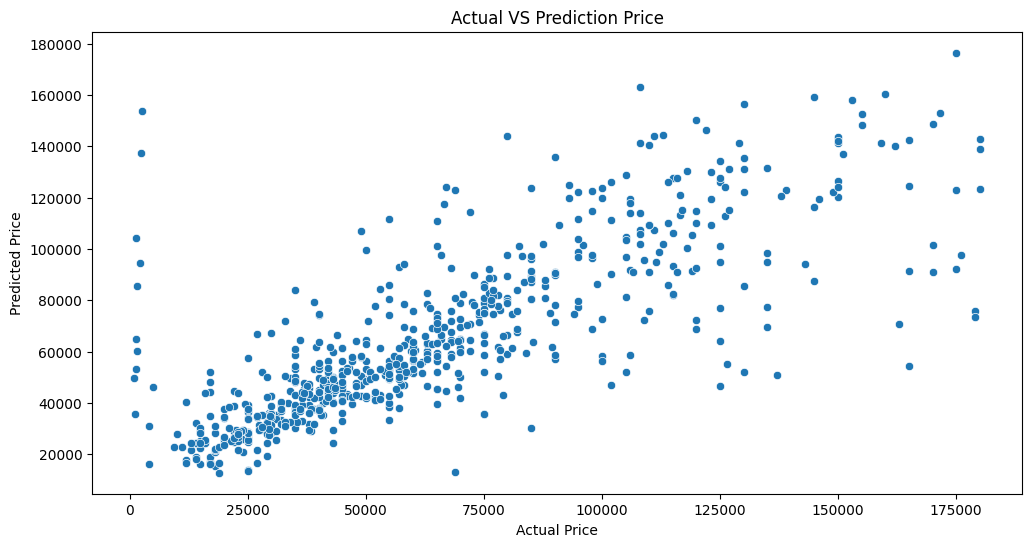

In [79]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title= 'Actual VS Prediction Price', 
                                               xlabel= 'Actual Price', 
                                               ylabel= 'Predicted Price');

- Berdasarkan gambar scatter plot di atas menunjukkan bahwa masih banyak terdapat hasil nilai prediksi yang belum dapat memprediksi nilai aktual model dengan baik. Hal ini dapat dilihat juga dari harga prediksi mobil yang tinggi, tetapi memiliki harga aktual yang rendah atau begitu pula dengan sebaliknya.

## 5.  Conclusion

Berikut ini merupakan beberapa kesimpulan yang dapat diambil dari pembangunan model secara keseluruhan:

- Fitur 'Year' dan 'Engine_Size' memiliki korelasi positif dengan fitur target 'Price', sedangkan fitur 'Mileage' berkorelasi negatif. Untuk fitur kategorikal, fitur 'Type' memiliki korelasi ratio yang paling baik terhadap fitur target 'Price' dibandingkan fitur kategorikal lainnya.
- Terdapat beberapa batasan yang ditetapkan dalam membangun model ini, yaitu:

    1. Mengeliminasi baris dengan isi data yang duplikat sebanyak 4 buah, baris dengan isi data == 0 dan 1 pada fitur 'Price' sebanyak 1796 dan 1 buah. Data-data tersebut harus dieliminasi supaya model yang dibangun dapat memprediksi dengan menggunakan harga yang nyata dan mendapatkan hasil prediksi yang baik, akan tetapi hal tersebut membuat jumlah observasi data menjadi cukup banyak berkurang.
    2. Dalam memprediksi, model menggunakan data fitur 'Year' dengan nilai kurang dari atau sama dengan tahun 2025.
    3. Dalam memprediksi, model menggunakan data fitur 'Engine_Size' dengan nilai kurang dari atau sama dengan 7.
    4. Dalam memprediksi, model menggunakan data fitur 'Mileage' dengan nilai kurang dari 385500 km.
    5. Dalam memprediksi, model menggunakan data fitur 'Price' dengan nilai kurang dari atau sama dengan 183750 Saudi Riyal (SAR).
- Metrik evaluasi yang digunakan dalam pembangunan model ini adalah R-square, RMSE, MAE, dan MAPE. 
    - Nilai R-square menunjukkan seberapa besar pengaruh fitur-fitur (variabel independen) terhadap target (variabel dependen) secara menyeluruh. Jika dilihat nilai R-square yang dihasilkan oleh model XGBoost setelah dilakukan proses tuning hyperparameter lebih tinggi dibandingkan dengan model XGBoost sebelum dilakukan proses tuning hyperparameter. Nilai R-square tersebut adalah 0.632565, artinya fitur dapat menjelaskan 63.25% dari keseluruhan model.
    - Nilai RMSE setelah dilakukan proses tuning hyperparameter adalah sebesar nilai 23757.04, artinya model yang dibangun untuk memprediksi harga mobil bekas di antara rentang harga 0 sampai dengan 183750 SAR, maka harga rata-rata dari prediksi tersebut akan meleset sekitar 23757.04 dari harga aktual. 
    - Harga prediksi tersebut bisa saja meleset lebih jauh lagi apabila dilihat dari nilai MAE dan MAPE yang besar sebelum dilakukan proses tuning hyperparameter. Beruntung nilai RMSE, MAE, dan MAPE dari model mengalami penurunan setelah dilakukan proses tuning hyperparameter. Hal ini menunjukkan bahwa proses tersebut berhasil meningkatkan kinerja model dan dapat membuat prediksi yang lebih baik.

## 6.  Recommendation

Berikut ini merupakan beberapa rekomendasi yang dapat diberikan dari pembangunan model agar dapat menghasilkan prediksi yang lebih baik:

- Setelah dilakukan proses eliminasi berupa penghapusan baris data dengan nilai == 0 dan 1 SAR pada fitur 'Price', pembatasan nilai pada baris data di fitur 'Year', 'Engine_Size', 'Mileage', dan 'Price' karena adanya outlier, jumlah observasi data yang digunakan untuk pembangunan model hanya tersisa 3.408 baris data atau sekitar 40% dari jumlah pada dataframe awal. Oleh karena itu, untuk pembangunan model selanjutnya disarankan untuk menambahkan jumlah baris data yang akan digunakan, sehingga dapat menghasilkan prediksi yang lebih akurat, karena data yang digunakan pada pembangunan model saat ini sangat sedikit untuk bisa memberikan hasil prediksi yang maksimal.
- Menambahkan beberapa fitur lain yang memiliki korelasi yang baik dengan fitur target 'Price'. Seperti warna mobil, kondisi interior dan eksterior mobil, kelengkapan dokumen (BPKB, STNK, dan Buku Manual), riwayat pemeliharaan mobil, dan riwayat kecelakaan. (Sumber: [What are the factors that influence a used car price?](https://carsellzone.com/blog/detail/factors-affect-car-price))
- Menambahkan fitur yang dapat membedakan antara mobil classic dengan mobil biasa yang digunakan sehari-hari. Hal ini dikarenakan korelasi antara fitur 'Mileage' dengan target 'Price' antara mobil classic dengan mobil biasa memberikan hasil yang berbeda. Contohnya, mobil classic yang diproduksi pada tahun 1970 cenderung akan lebih mahal dibandingkan dengan mobil keluaran tahun 2005. Akan tetapi, untuk mengklasifikasikan hal tersebut diperlukan adanya domain knowledge mengenai jenis mobil apa saja yang dapat dikategorikan ke dalam jenis mobil classic.

### Save Model

In [80]:
# Menyimpan model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_SaudiUsedCarPrice_XGB_Pickle.sav', 'wb'))

In [81]:
# Memuat model
filename = 'Model_SaudiUsedCarPrice_XGB_Pickle.sav'
loaded_model = pickle.load(open(filename, 'rb'))